# LSTM

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier
from src.utils import preprocess
from tqdm import tqdm

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from keras.layers import Embedding
from keras.layers import LSTM
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import losses

import time
random.seed(7)

%matplotlib inline
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading data

In [2]:
# Open files
Data_X_train = pd.read_csv('data/challenge_fichier_dentrees_dentrainement_challenge_nba/train.csv')
Data_Y_train = pd.read_csv('data/challenge_fichier_de_sortie_dentrainement_challenge_nba.csv', sep=';')
X_test = pd.read_csv('data/challenge_fichiers_dentrees_de_test_challenge_nba/test.csv')

**Data preprocessing : split train/validation and remove ID**

In [3]:
X_train, Y_train, X_val, Y_val = preprocess(Data_X_train, Data_Y_train, 0.7, True)

## Model evaluation

In [4]:
nb_games_train = len(X_train)
nb_games_val = len(X_val)

X_train = X_train.reshape((nb_games_train, 4, 1440), order = 'F')
X_val = X_val.reshape((nb_games_val, 4, 1440), order = 'F')

Y_train = np_utils.to_categorical(Y_train, 2)
Y_val = np_utils.to_categorical(Y_val, 2)

In [5]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape = (4, 1440)))
lstm_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
lstm_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = lstm_model.fit(X_train, Y_train, epochs = 100, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = lstm_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/100
8803/8803 [==============================] - 49s 6ms/step - loss: 0.6555 - acc: 0.6207
Epoch 2/100
8803/8803 [==============================] - 4s 460us/step - loss: 0.6426 - acc: 0.6360
Epoch 3/100
8803/8803 [==============================] - 4s 447us/step - loss: 0.6325 - acc: 0.6523
Epoch 4/100
8803/8803 [==============================] - 4s 465us/step - loss: 0.6284 - acc: 0.6532
Epoch 5/100
8803/8803 [==============================] - 4s 465us/step - loss: 0.6221 - acc: 0.6643
Epoch 6/100
8803/8803 [==============================] - 4s 462us/step - loss: 0.6220 - acc: 0.6642
Epoch 7/100
8803/8803 [==============================] - 4s 451us/step - loss: 0.6235 - acc: 0.6589
Epoch 8/100
8803/8803 [==============================] - 4s 468us/step - loss: 0.6217 - acc: 0.6638
Epoch 9/100
8803/8803 [==============================] - 4s 483us/step - loss: 0.6151 - acc: 0.6740
Epoch 10/100
8803/8803 [==============================] - 4s 441us/step - loss: 0.6156 - acc: 0.6731


8803/8803 [==============================] - 4s 467us/step - loss: 0.5654 - acc: 0.7131
Epoch 83/100
8803/8803 [==============================] - 4s 470us/step - loss: 0.5655 - acc: 0.7148
Epoch 84/100
8803/8803 [==============================] - 4s 467us/step - loss: 0.5620 - acc: 0.7100
Epoch 85/100
8803/8803 [==============================] - 4s 487us/step - loss: 0.5598 - acc: 0.7190
Epoch 86/100
8803/8803 [==============================] - 4s 489us/step - loss: 0.5571 - acc: 0.7236
Epoch 87/100
8803/8803 [==============================] - 4s 472us/step - loss: 0.5617 - acc: 0.7177
Epoch 88/100
8803/8803 [==============================] - 4s 481us/step - loss: 0.5640 - acc: 0.7127
Epoch 89/100
8803/8803 [==============================] - 4s 467us/step - loss: 0.5577 - acc: 0.7201
Epoch 90/100
8803/8803 [==============================] - 4s 470us/step - loss: 0.5568 - acc: 0.7184
Epoch 91/100
8803/8803 [==============================] - 4s 471us/step - loss: 0.5595 - acc: 0.7218
Epo

NameError: name 'conv_model' is not defined

In [ ]:
conv_model.save('models/lstm1.h5')

In [6]:
print('\nTEST')
evalu = lstm_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))


TEST
3773/3773 [==============================] - 2s 496us/step
Loss: 0.6697600832075205
Accuracy: 0.647495361733683


# Aggregate by subsequence of 15 seconds.

In [17]:
X_train_seq = X_train.reshape((nb_games_train, 4, 15, -1), order = 'F')
X_train_seq = X_train_seq.mean(axis = 2)

X_val_seq = X_val.reshape((nb_games_val, 4, 15, -1), order = 'F')
X_val_seq = X_val_seq.mean(axis = 2)

In [23]:
lstm_model = Sequential()
lstm_model.add(LSTM(25, input_shape = (4, 96), dropout = 0.5))
lstm_model.add(Dense(units = 2, 
                activation='softmax'))
# 	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True, dropout=dropout))
#Construct Loss
lstm_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = lstm_model.fit(X_train_seq, Y_train, epochs = 100, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = lstm_model.evaluate(X_val_seq, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/100
8803/8803 [==============================] - 5s 557us/step - loss: 0.6807 - acc: 0.5912
Epoch 2/100
8803/8803 [==============================] - 2s 273us/step - loss: 0.6365 - acc: 0.6507
Epoch 3/100
8803/8803 [==============================] - 2s 275us/step - loss: 0.6256 - acc: 0.6628
Epoch 4/100
8803/8803 [==============================] - 2s 278us/step - loss: 0.6188 - acc: 0.6700
Epoch 5/100
8803/8803 [==============================] - 2s 276us/step - loss: 0.6107 - acc: 0.6740
Epoch 6/100
8803/8803 [==============================] - 2s 281us/step - loss: 0.6081 - acc: 0.6781
Epoch 7/100
8803/8803 [==============================] - 3s 305us/step - loss: 0.6074 - acc: 0.6828
Epoch 8/100
8803/8803 [==============================] - 2s 280us/step - loss: 0.6039 - acc: 0.6810
Epoch 9/100
8803/8803 [==============================] - 2s 278us/step - loss: 0.5982 - acc: 0.6868
Epoch 10/100
8803/8803 [==============================] - 2s 279us/step - loss: 0.5935 - acc: 0.6895

8803/8803 [==============================] - 2s 273us/step - loss: 0.5495 - acc: 0.7234
Epoch 83/100
8803/8803 [==============================] - 2s 278us/step - loss: 0.5469 - acc: 0.7312
Epoch 84/100
8803/8803 [==============================] - 2s 269us/step - loss: 0.5503 - acc: 0.7319
Epoch 85/100
8803/8803 [==============================] - 2s 270us/step - loss: 0.5518 - acc: 0.7263
Epoch 86/100
8803/8803 [==============================] - 2s 266us/step - loss: 0.5543 - acc: 0.7263
Epoch 87/100
8803/8803 [==============================] - 2s 269us/step - loss: 0.5532 - acc: 0.7245
Epoch 88/100
8803/8803 [==============================] - 2s 268us/step - loss: 0.5450 - acc: 0.7284
Epoch 89/100
8803/8803 [==============================] - 2s 270us/step - loss: 0.5490 - acc: 0.7316
Epoch 90/100
8803/8803 [==============================] - 2s 267us/step - loss: 0.5494 - acc: 0.7287
Epoch 91/100
8803/8803 [==============================] - 2s 266us/step - loss: 0.5457 - acc: 0.7312
Epo

In [25]:
lstm_model = Sequential()
lstm_model.add(LSTM(75, input_shape = (4, 96), dropout = 0.5))
lstm_model.add(Dense(units = 10,
                     activation = 'relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(units = 2, 
                activation='softmax'))
# 	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True, dropout=dropout))
#Construct Loss
lstm_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = lstm_model.fit(X_train_seq, Y_train, epochs = 100, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = lstm_model.evaluate(X_val_seq, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/100
8803/8803 [==============================] - 4s 427us/step - loss: 0.6746 - acc: 0.5920
Epoch 2/100
8803/8803 [==============================] - 3s 294us/step - loss: 0.6434 - acc: 0.6374
Epoch 3/100
8803/8803 [==============================] - 3s 293us/step - loss: 0.6289 - acc: 0.6551
Epoch 4/100
8803/8803 [==============================] - 3s 299us/step - loss: 0.6324 - acc: 0.6536
Epoch 5/100
8803/8803 [==============================] - 3s 295us/step - loss: 0.6264 - acc: 0.6660
Epoch 6/100
8803/8803 [==============================] - 3s 297us/step - loss: 0.6197 - acc: 0.6588
Epoch 7/100
8803/8803 [==============================] - 3s 298us/step - loss: 0.6162 - acc: 0.6744
Epoch 8/100
8803/8803 [==============================] - 3s 295us/step - loss: 0.6170 - acc: 0.6724
Epoch 9/100
8803/8803 [==============================] - 3s 305us/step - loss: 0.6053 - acc: 0.6832
Epoch 10/100
8803/8803 [==============================] - 3s 296us/step - loss: 0.6070 - acc: 0.6801

8803/8803 [==============================] - 2s 261us/step - loss: 0.5303 - acc: 0.7393
Epoch 83/100
8803/8803 [==============================] - 2s 267us/step - loss: 0.5281 - acc: 0.7402
Epoch 84/100
8803/8803 [==============================] - 2s 263us/step - loss: 0.5341 - acc: 0.7400
Epoch 85/100
8803/8803 [==============================] - 3s 292us/step - loss: 0.5207 - acc: 0.7504
Epoch 86/100
8803/8803 [==============================] - 3s 321us/step - loss: 0.5209 - acc: 0.7445
Epoch 87/100
8803/8803 [==============================] - 3s 307us/step - loss: 0.5241 - acc: 0.7434
Epoch 88/100
8803/8803 [==============================] - 3s 323us/step - loss: 0.5223 - acc: 0.7454
Epoch 89/100
8803/8803 [==============================] - 3s 312us/step - loss: 0.5311 - acc: 0.7379
Epoch 90/100
8803/8803 [==============================] - 3s 310us/step - loss: 0.5193 - acc: 0.7472
Epoch 91/100
8803/8803 [==============================] - 3s 308us/step - loss: 0.5291 - acc: 0.7417
Epo

# More aggregation features

In [27]:
X_train_seq_10 = X_train.reshape((nb_games_train, 4, 10, -1), order = 'F')
X_train_seq_10 = X_train_seq_10.mean(axis = 2)

X_val_seq_10 = X_val.reshape((nb_games_val, 4, 10, -1), order = 'F')
X_val_seq_10 = X_val_seq_10.mean(axis = 2)

In [28]:
lstm_model = Sequential()
lstm_model.add(LSTM(75, input_shape = (4, 144), dropout = 0.5))
lstm_model.add(Dense(units = 10,
                     activation = 'relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(units = 2, 
                activation='softmax'))
# 	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True, dropout=dropout))
#Construct Loss
lstm_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = lstm_model.fit(X_train_seq_10, Y_train, epochs = 100, batch_size = 32, verbose = True)
end = time.time()

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))
ax1.plot(training.history['loss'])
ax1.set_title('LOSS as a function of iterations')
ax2.plot(training.history['acc'])
ax2.set_title('ACCURACY as a function of iterations')

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = lstm_model.evaluate(X_val_seq_10, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/100
8803/8803 [==============================] - 3s 391us/step - loss: 0.6758 - acc: 0.5891
Epoch 2/100
8803/8803 [==============================] - 3s 312us/step - loss: 0.6445 - acc: 0.6246
Epoch 3/100
8803/8803 [==============================] - 3s 336us/step - loss: 0.6358 - acc: 0.6467
Epoch 4/100
8803/8803 [==============================] - 3s 313us/step - loss: 0.6338 - acc: 0.6402
Epoch 5/100
8803/8803 [==============================] - 3s 344us/step - loss: 0.6244 - acc: 0.6594
Epoch 6/100
8803/8803 [==============================] - 3s 294us/step - loss: 0.6196 - acc: 0.6681
Epoch 7/100
8803/8803 [==============================] - 2s 275us/step - loss: 0.6186 - acc: 0.6611
Epoch 8/100
8803/8803 [==============================] - 2s 276us/step - loss: 0.6141 - acc: 0.6737
Epoch 9/100
8803/8803 [==============================] - 3s 336us/step - loss: 0.6106 - acc: 0.6739
Epoch 10/100
8803/8803 [==============================] - 3s 322us/step - loss: 0.6075 - acc: 0.6758

8803/8803 [==============================] - 3s 317us/step - loss: 0.5258 - acc: 0.7489
Epoch 83/100
8803/8803 [==============================] - 3s 376us/step - loss: 0.5256 - acc: 0.7471
Epoch 84/100
8803/8803 [==============================] - 3s 356us/step - loss: 0.5315 - acc: 0.7450
Epoch 85/100
8803/8803 [==============================] - 3s 335us/step - loss: 0.5203 - acc: 0.7483
Epoch 86/100
8803/8803 [==============================] - 3s 328us/step - loss: 0.5273 - acc: 0.7386
Epoch 87/100
8803/8803 [==============================] - 4s 411us/step - loss: 0.5178 - acc: 0.7543
Epoch 88/100
8803/8803 [==============================] - 3s 292us/step - loss: 0.5189 - acc: 0.7522
Epoch 89/100
8803/8803 [==============================] - 3s 304us/step - loss: 0.5208 - acc: 0.7461
Epoch 90/100
8803/8803 [==============================] - 3s 294us/step - loss: 0.5232 - acc: 0.7402
Epoch 91/100
8803/8803 [==============================] - 3s 336us/step - loss: 0.5212 - acc: 0.7451
Epo

In [29]:
def descrp_stats(array, axis):
    array_mean = array.mean(axis = axis)
    array_max = array.max(axis = axis)
    array_min = array.min(axis = axis)
    array_std = array.std(axis = axis)
    
    return np.hstack([array_mean, array_max, array_min, array_std])

In [40]:
X_train_stat_descrp = X_train.reshape((nb_games_train, 4, 10, -1), order = 'F')
X_train_stat_descrp = descrp_stats(X_train_stat_descrp, 2)

X_val_stat_descrp = X_val.reshape((nb_games_val, 4, 10, -1), order = 'F')
X_val_stat_descrp = descrp_stats(X_val_stat_descrp, 2)

Epoch 1/100
8803/8803 [==============================] - 9s 972us/step - loss: 0.6857 - acc: 0.5613
Epoch 2/100
8803/8803 [==============================] - 6s 693us/step - loss: 0.6594 - acc: 0.5964
Epoch 3/100
8803/8803 [==============================] - 6s 720us/step - loss: 0.6442 - acc: 0.6268
Epoch 4/100
8803/8803 [==============================] - 6s 686us/step - loss: 0.6318 - acc: 0.6419
Epoch 5/100
8803/8803 [==============================] - 6s 692us/step - loss: 0.6241 - acc: 0.6498
Epoch 6/100
8803/8803 [==============================] - 6s 688us/step - loss: 0.6221 - acc: 0.6540
Epoch 7/100
8803/8803 [==============================] - 6s 684us/step - loss: 0.6171 - acc: 0.6567
Epoch 8/100
8803/8803 [==============================] - 6s 688us/step - loss: 0.6167 - acc: 0.6507
Epoch 9/100
8803/8803 [==============================] - 6s 684us/step - loss: 0.6123 - acc: 0.6689
Epoch 10/100
8803/8803 [==============================] - 6s 682us/step - loss: 0.6080 - acc: 0.6661

8803/8803 [==============================] - 6s 675us/step - loss: 0.4137 - acc: 0.8156
Epoch 81/100
8803/8803 [==============================] - 6s 679us/step - loss: 0.4197 - acc: 0.8129
Epoch 82/100
8803/8803 [==============================] - 6s 676us/step - loss: 0.4236 - acc: 0.8110
Epoch 83/100
8803/8803 [==============================] - 6s 694us/step - loss: 0.4158 - acc: 0.8117
Epoch 84/100
8803/8803 [==============================] - 6s 699us/step - loss: 0.4254 - acc: 0.8100
Epoch 85/100
8803/8803 [==============================] - 6s 682us/step - loss: 0.4224 - acc: 0.8123
Epoch 86/100
8803/8803 [==============================] - 6s 691us/step - loss: 0.4129 - acc: 0.8114
Epoch 87/100
8803/8803 [==============================] - 6s 690us/step - loss: 0.4111 - acc: 0.8182 1s - loss: 0
Epoch 88/100
8803/8803 [==============================] - 6s 693us/step - loss: 0.4114 - acc: 0.8192
Epoch 89/100
8803/8803 [==============================] - 6s 686us/step - loss: 0.4116 - ac

ValueError: Input arrays should have the same number of samples as target arrays. Found 8803 input samples and 3773 target samples.

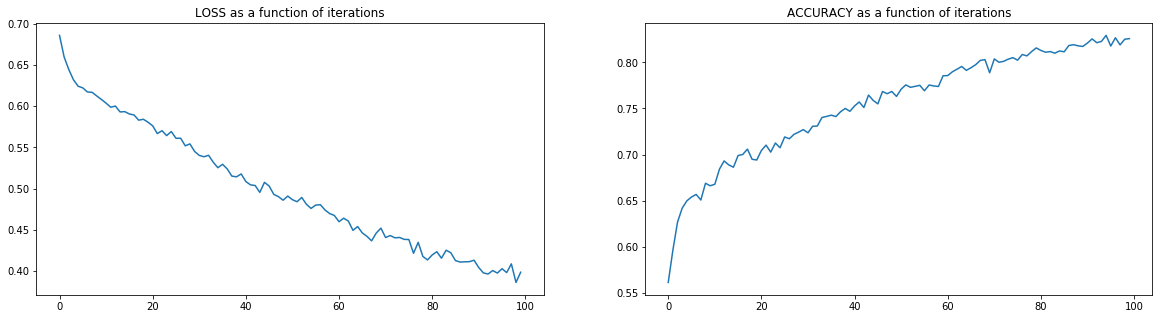

In [39]:
lstm_model = Sequential()
lstm_model.add(LSTM(75, input_shape = (16, 144), dropout = 0.5))
lstm_model.add(Dense(units = 10,
                     activation = 'relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(units = 2, 
                activation='softmax'))
# 	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True, dropout=dropout))
#Construct Loss
lstm_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = lstm_model.fit(X_train_stat_descrp, Y_train, epochs = 100, batch_size = 32, verbose = True)
end = time.time()

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))
ax1.plot(training.history['loss'])
ax1.set_title('LOSS as a function of iterations')
ax2.plot(training.history['acc'])
ax2.set_title('ACCURACY as a function of iterations')

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = lstm_model.evaluate(X_val_stat_descrp, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

In [41]:
print('\nTEST')
evalu = lstm_model.evaluate(X_val_stat_descrp, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))


TEST
3773/3773 [==============================] - 1s 384us/step
Loss: 0.7800110417558633
Accuracy: 0.6663132783686043


In [42]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape = (16, 144), dropout = 0.5))
lstm_model.add(Dense(units = 2, 
                activation='softmax'))
#Construct Loss
lstm_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = lstm_model.fit(X_train_stat_descrp, Y_train, epochs = 150, batch_size = 32, verbose = True)
end = time.time()

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))
ax1.plot(training.history['loss'])
ax1.set_title('LOSS as a function of iterations')
ax2.plot(training.history['acc'])
ax2.set_title('ACCURACY as a function of iterations')

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = lstm_model.evaluate(X_val_stat_descrp, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/150
8803/8803 [==============================] - 7s 843us/step - loss: 0.6782 - acc: 0.5679
Epoch 2/150
8803/8803 [==============================] - 6s 670us/step - loss: 0.6323 - acc: 0.6478
Epoch 3/150
8803/8803 [==============================] - 6s 674us/step - loss: 0.6101 - acc: 0.6769
Epoch 4/150
8803/8803 [==============================] - 6s 677us/step - loss: 0.6042 - acc: 0.6878
Epoch 5/150
8803/8803 [==============================] - 6s 678us/step - loss: 0.5954 - acc: 0.6895
Epoch 6/150
8803/8803 [==============================] - 6s 681us/step - loss: 0.5900 - acc: 0.6925
Epoch 7/150
8803/8803 [==============================] - 6s 675us/step - loss: 0.5831 - acc: 0.6984
Epoch 8/150
8803/8803 [==============================] - 6s 682us/step - loss: 0.5792 - acc: 0.6954
Epoch 9/150
8803/8803 [==============================] - 6s 677us/step - loss: 0.5755 - acc: 0.7018
Epoch 10/150
8803/8803 [==============================] - 6s 683us/step - loss: 0.5708 - acc: 0.7062

8803/8803 [==============================] - 6s 665us/step - loss: 0.4078 - acc: 0.8103
Epoch 79/150
8803/8803 [==============================] - 6s 674us/step - loss: 0.4062 - acc: 0.8118
Epoch 80/150
8803/8803 [==============================] - 6s 659us/step - loss: 0.4054 - acc: 0.8162
Epoch 81/150
8803/8803 [==============================] - 6s 667us/step - loss: 0.4061 - acc: 0.8122
Epoch 82/150
8803/8803 [==============================] - 6s 709us/step - loss: 0.4113 - acc: 0.8130
Epoch 83/150
8803/8803 [==============================] - 7s 766us/step - loss: 0.4068 - acc: 0.8121
Epoch 84/150
8803/8803 [==============================] - 6s 715us/step - loss: 0.4044 - acc: 0.8159
Epoch 85/150
8803/8803 [==============================] - 6s 687us/step - loss: 0.4053 - acc: 0.8140 1s - lo
Epoch 86/150
8803/8803 [==============================] - 6s 683us/step - loss: 0.3971 - acc: 0.8172
Epoch 87/150
8803/8803 [==============================] - 6s 681us/step - loss: 0.3904 - acc: 0.

KeyboardInterrupt: 

In [43]:
print('\nTEST')
evalu = lstm_model.evaluate(X_val_stat_descrp, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))


TEST
3773/3773 [==============================] - 3s 802us/step
Loss: 0.7488421023034177
Accuracy: 0.6787702091928821


Epoch 1/100
8803/8803 [==============================] - 8s 855us/step - loss: 0.6939 - acc: 0.5438
Epoch 2/100
8803/8803 [==============================] - 6s 701us/step - loss: 0.6855 - acc: 0.5606
Epoch 3/100
8803/8803 [==============================] - 6s 708us/step - loss: 0.6824 - acc: 0.5648
Epoch 4/100
8803/8803 [==============================] - 6s 728us/step - loss: 0.6776 - acc: 0.5733
Epoch 5/100
8803/8803 [==============================] - 6s 737us/step - loss: 0.6708 - acc: 0.5800
Epoch 6/100
8803/8803 [==============================] - 7s 761us/step - loss: 0.6577 - acc: 0.6066
Epoch 7/100
8803/8803 [==============================] - 6s 719us/step - loss: 0.6461 - acc: 0.6258
Epoch 8/100
8803/8803 [==============================] - 6s 658us/step - loss: 0.6382 - acc: 0.6451
Epoch 9/100
8803/8803 [==============================] - 7s 790us/step - loss: 0.6336 - acc: 0.6448
Epoch 10/100
8803/8803 [==============================] - 6s 690us/step - loss: 0.6312 - acc: 0.6522

8803/8803 [==============================] - 6s 665us/step - loss: 0.5801 - acc: 0.6964
Epoch 82/100
8803/8803 [==============================] - 6s 662us/step - loss: 0.5789 - acc: 0.6986
Epoch 83/100
8803/8803 [==============================] - 7s 761us/step - loss: 0.5792 - acc: 0.7016
Epoch 84/100
8803/8803 [==============================] - 6s 682us/step - loss: 0.5784 - acc: 0.6962
Epoch 85/100
8803/8803 [==============================] - 5s 622us/step - loss: 0.5753 - acc: 0.7018
Epoch 86/100
8803/8803 [==============================] - 5s 610us/step - loss: 0.5740 - acc: 0.7039
Epoch 87/100
8803/8803 [==============================] - 5s 608us/step - loss: 0.5776 - acc: 0.7046
Epoch 88/100
8803/8803 [==============================] - 5s 608us/step - loss: 0.5787 - acc: 0.7059
Epoch 89/100
8803/8803 [==============================] - 5s 610us/step - loss: 0.5764 - acc: 0.7001
Epoch 90/100
8803/8803 [==============================] - 5s 613us/step - loss: 0.5751 - acc: 0.7023
Epo

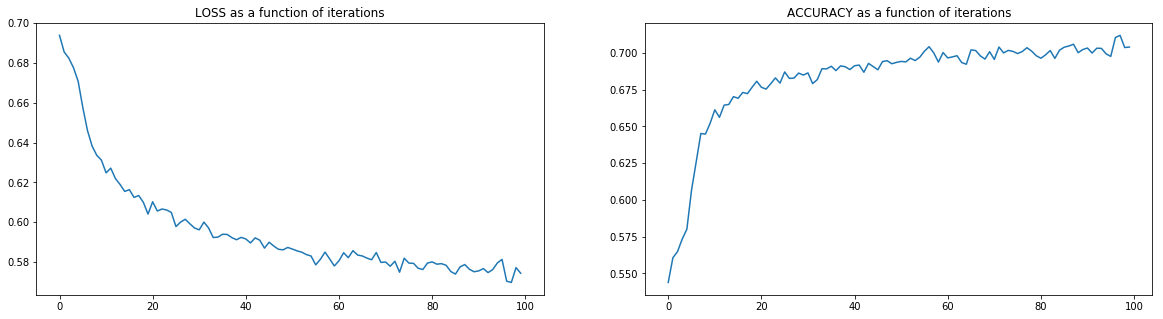

In [44]:
lstm_model = Sequential()
lstm_model.add(LSTM(15, input_shape = (16, 144), dropout = 0.7))
lstm_model.add(Dense(units = 2, 
                activation='softmax'))
#Construct Loss
lstm_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = lstm_model.fit(X_train_stat_descrp, Y_train, epochs = 100, batch_size = 32, verbose = True)
end = time.time()

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))
ax1.plot(training.history['loss'])
ax1.set_title('LOSS as a function of iterations')
ax2.plot(training.history['acc'])
ax2.set_title('ACCURACY as a function of iterations')

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = lstm_model.evaluate(X_val_stat_descrp, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

In [45]:
from keras import regularizers

Epoch 1/100
8803/8803 [==============================] - 7s 808us/step - loss: 0.7780 - acc: 0.5491
Epoch 2/100
8803/8803 [==============================] - 6s 682us/step - loss: 0.6972 - acc: 0.5681
Epoch 3/100
8803/8803 [==============================] - 6s 672us/step - loss: 0.6885 - acc: 0.5682
Epoch 4/100
8803/8803 [==============================] - 6s 672us/step - loss: 0.6863 - acc: 0.5681
Epoch 5/100
8803/8803 [==============================] - 6s 674us/step - loss: 0.6851 - acc: 0.5682
Epoch 6/100
8803/8803 [==============================] - 6s 672us/step - loss: 0.6853 - acc: 0.5681
Epoch 7/100
8803/8803 [==============================] - 6s 722us/step - loss: 0.6845 - acc: 0.5682
Epoch 8/100
8803/8803 [==============================] - 6s 683us/step - loss: 0.6841 - acc: 0.5682
Epoch 9/100
8803/8803 [==============================] - 6s 653us/step - loss: 0.6832 - acc: 0.5688
Epoch 10/100
8803/8803 [==============================] - 6s 657us/step - loss: 0.6806 - acc: 0.5699

8803/8803 [==============================] - 6s 669us/step - loss: 0.5930 - acc: 0.6909
Epoch 79/100
8803/8803 [==============================] - 6s 668us/step - loss: 0.5927 - acc: 0.6982
Epoch 80/100
8803/8803 [==============================] - 6s 665us/step - loss: 0.5895 - acc: 0.6987
Epoch 81/100
8803/8803 [==============================] - 6s 666us/step - loss: 0.5884 - acc: 0.7001
Epoch 82/100
8803/8803 [==============================] - 6s 662us/step - loss: 0.5907 - acc: 0.6926
Epoch 83/100
8803/8803 [==============================] - 6s 715us/step - loss: 0.5926 - acc: 0.6903
Epoch 84/100
8803/8803 [==============================] - 7s 783us/step - loss: 0.5909 - acc: 0.6984
Epoch 85/100
8803/8803 [==============================] - 7s 799us/step - loss: 0.5939 - acc: 0.6923
Epoch 86/100
8803/8803 [==============================] - 7s 759us/step - loss: 0.5878 - acc: 0.6996
Epoch 87/100
8803/8803 [==============================] - 6s 699us/step - loss: 0.5898 - acc: 0.6961
Epo

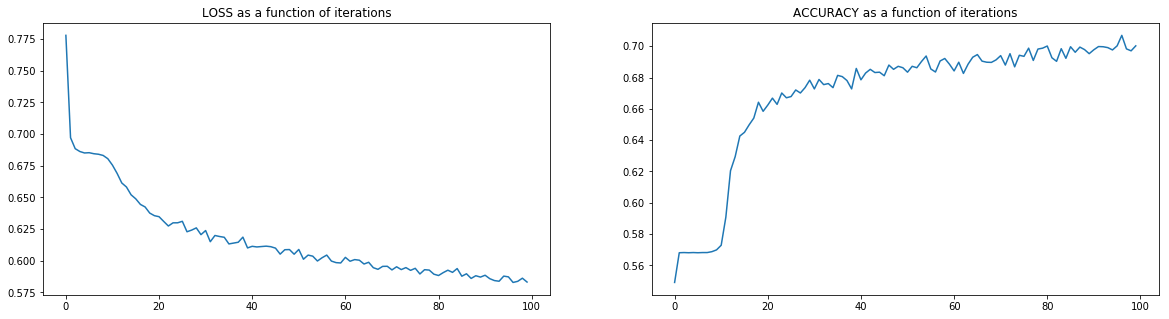

In [47]:
lstm_model = Sequential()
lstm_model.add(LSTM(25, 
                    input_shape = (16, 144), 
                    dropout = 0.7,
                    activity_regularizer = regularizers.l2(0.01)))
lstm_model.add(Dense(units = 2, 
                activation='softmax'))
#Construct Loss
lstm_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = lstm_model.fit(X_train_stat_descrp, Y_train, epochs = 100, batch_size = 32, verbose = True)
end = time.time()

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))
ax1.plot(training.history['loss'])
ax1.set_title('LOSS as a function of iterations')
ax2.plot(training.history['acc'])
ax2.set_title('ACCURACY as a function of iterations')

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = lstm_model.evaluate(X_val_stat_descrp, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/100
8803/8803 [==============================] - 7s 826us/step - loss: 0.7670 - acc: 0.5578
Epoch 2/100
8803/8803 [==============================] - 6s 672us/step - loss: 0.6919 - acc: 0.5716
Epoch 3/100
8803/8803 [==============================] - 6s 686us/step - loss: 0.6848 - acc: 0.5700
Epoch 4/100
8803/8803 [==============================] - 6s 698us/step - loss: 0.6784 - acc: 0.5745
Epoch 5/100
8803/8803 [==============================] - 6s 670us/step - loss: 0.6634 - acc: 0.6206
Epoch 6/100
8803/8803 [==============================] - 6s 640us/step - loss: 0.6496 - acc: 0.6527
Epoch 7/100
8803/8803 [==============================] - 6s 662us/step - loss: 0.6407 - acc: 0.6573
Epoch 8/100
8803/8803 [==============================] - 6s 726us/step - loss: 0.6340 - acc: 0.6660
Epoch 9/100
8803/8803 [==============================] - 6s 729us/step - loss: 0.6265 - acc: 0.6762
Epoch 10/100
8803/8803 [==============================] - 6s 697us/step - loss: 0.6201 - acc: 0.6786

8803/8803 [==============================] - 6s 671us/step - loss: 0.4894 - acc: 0.7677
Epoch 79/100
8803/8803 [==============================] - 6s 669us/step - loss: 0.4841 - acc: 0.7758
Epoch 80/100
8803/8803 [==============================] - 6s 673us/step - loss: 0.4796 - acc: 0.7789
Epoch 81/100
8803/8803 [==============================] - 6s 681us/step - loss: 0.4812 - acc: 0.7785
Epoch 82/100
8803/8803 [==============================] - 6s 674us/step - loss: 0.4773 - acc: 0.7812
Epoch 83/100
8803/8803 [==============================] - 6s 676us/step - loss: 0.4781 - acc: 0.7785
Epoch 84/100
8803/8803 [==============================] - 6s 681us/step - loss: 0.4857 - acc: 0.7726
Epoch 85/100
8803/8803 [==============================] - 6s 677us/step - loss: 0.4784 - acc: 0.7821
Epoch 86/100
8803/8803 [==============================] - 6s 688us/step - loss: 0.4810 - acc: 0.7737
Epoch 87/100
8803/8803 [==============================] - 6s 688us/step - loss: 0.4769 - acc: 0.7773
Epo

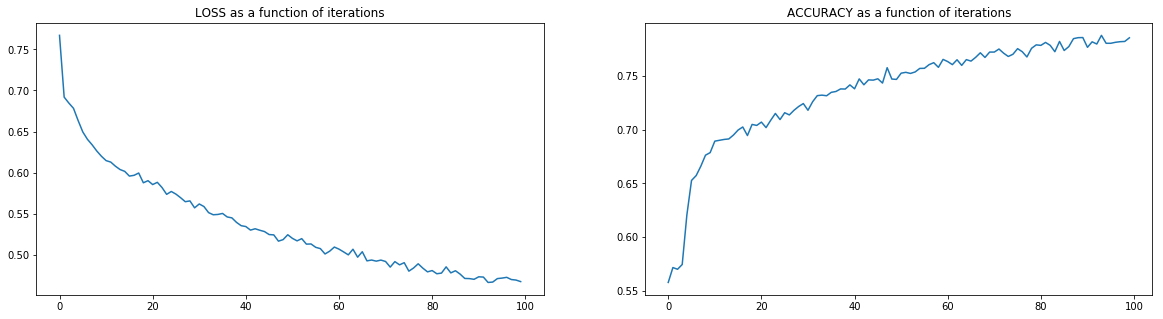

In [49]:
lstm_model = Sequential()
lstm_model.add(LSTM(35, 
                    input_shape = (16, 144), 
                    dropout = 0.5,
                    activity_regularizer = regularizers.l2(0.01)))
lstm_model.add(Dense(units = 2, 
                activation='softmax'))
#Construct Loss
lstm_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = lstm_model.fit(X_train_stat_descrp, Y_train, epochs = 100, batch_size = 32, verbose = True)
end = time.time()

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))
ax1.plot(training.history['loss'])
ax1.set_title('LOSS as a function of iterations')
ax2.plot(training.history['acc'])
ax2.set_title('ACCURACY as a function of iterations')

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = lstm_model.evaluate(X_val_stat_descrp, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/100
8803/8803 [==============================] - 7s 843us/step - loss: 1.3214 - acc: 0.5462
Epoch 2/100
8803/8803 [==============================] - 6s 712us/step - loss: 0.7338 - acc: 0.5682
Epoch 3/100
8803/8803 [==============================] - 6s 676us/step - loss: 0.7017 - acc: 0.5681
Epoch 4/100
8803/8803 [==============================] - 6s 678us/step - loss: 0.6932 - acc: 0.5681 1s - loss
Epoch 5/100
8803/8803 [==============================] - 6s 686us/step - loss: 0.6898 - acc: 0.5681
Epoch 6/100
8803/8803 [==============================] - 6s 677us/step - loss: 0.6880 - acc: 0.5681
Epoch 7/100
8803/8803 [==============================] - 6s 684us/step - loss: 0.6869 - acc: 0.5681
Epoch 8/100
8803/8803 [==============================] - 6s 691us/step - loss: 0.6860 - acc: 0.5681
Epoch 9/100
8803/8803 [==============================] - 6s 691us/step - loss: 0.6857 - acc: 0.5681
Epoch 10/100
8803/8803 [==============================] - 6s 715us/step - loss: 0.6853 - a

8803/8803 [==============================] - 6s 625us/step - loss: 0.5414 - acc: 0.7403
Epoch 82/100
8803/8803 [==============================] - 6s 626us/step - loss: 0.5312 - acc: 0.7483
Epoch 83/100
8803/8803 [==============================] - 6s 627us/step - loss: 0.5351 - acc: 0.7461
Epoch 84/100
8803/8803 [==============================] - 6s 655us/step - loss: 0.5341 - acc: 0.7482
Epoch 85/100
8803/8803 [==============================] - 6s 719us/step - loss: 0.5346 - acc: 0.7454
Epoch 86/100
8803/8803 [==============================] - 6s 735us/step - loss: 0.5262 - acc: 0.7551
Epoch 87/100
8803/8803 [==============================] - 6s 688us/step - loss: 0.5253 - acc: 0.7536
Epoch 88/100
8803/8803 [==============================] - 6s 681us/step - loss: 0.5339 - acc: 0.7483
Epoch 89/100
8803/8803 [==============================] - 6s 686us/step - loss: 0.5267 - acc: 0.7555
Epoch 90/100
8803/8803 [==============================] - 6s 682us/step - loss: 0.5230 - acc: 0.7550
Epo

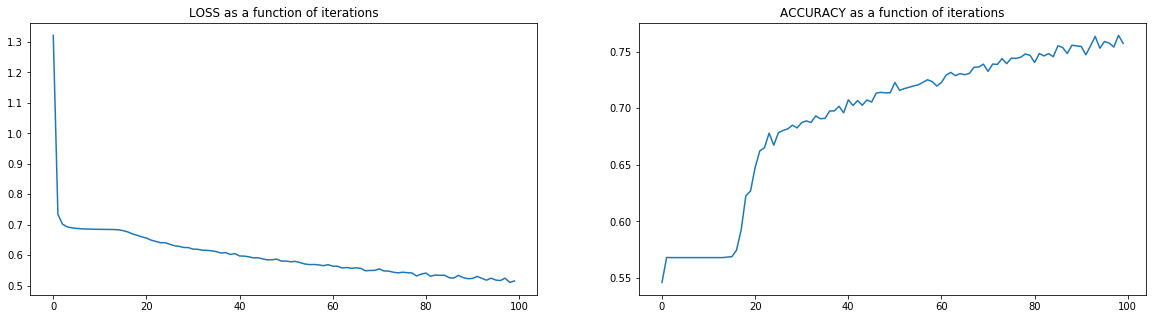

In [50]:
lstm_model = Sequential()
lstm_model.add(LSTM(35, 
                    input_shape = (16, 144), 
                    dropout = 0.5,
                    activity_regularizer = regularizers.l2(0.1)))
lstm_model.add(Dense(units = 2, 
                activation='softmax'))
#Construct Loss
lstm_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = lstm_model.fit(X_train_stat_descrp, Y_train, epochs = 100, batch_size = 32, verbose = True)
end = time.time()

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))
ax1.plot(training.history['loss'])
ax1.set_title('LOSS as a function of iterations')
ax2.plot(training.history['acc'])
ax2.set_title('ACCURACY as a function of iterations')

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = lstm_model.evaluate(X_val_stat_descrp, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

In [51]:
X_train, Y_train, X_val, Y_val = preprocess(Data_X_train, Data_Y_train, 0.7, False)

In [53]:
X_train_stat_descrp = X_train.reshape((nb_games_train, 11, 10, -1), order = 'F')
X_train_stat_descrp = descrp_stats(X_train_stat_descrp, 2)

X_val_stat_descrp = X_val.reshape((nb_games_val, 11, 10, -1), order = 'F')
X_val_stat_descrp = descrp_stats(X_val_stat_descrp, 2)

In [57]:
Y_train = np_utils.to_categorical(Y_train, 2)
Y_val = np_utils.to_categorical(Y_val, 2)

Epoch 1/100
8803/8803 [==============================] - 56s 6ms/step - loss: 0.8016 - acc: 0.5612
Epoch 2/100
8803/8803 [==============================] - 14s 2ms/step - loss: 0.6919 - acc: 0.5666
Epoch 3/100
8803/8803 [==============================] - 14s 2ms/step - loss: 0.6861 - acc: 0.5666
Epoch 4/100
8803/8803 [==============================] - 14s 2ms/step - loss: 0.6842 - acc: 0.5663
Epoch 5/100
8803/8803 [==============================] - 15s 2ms/step - loss: 0.6817 - acc: 0.5683
Epoch 6/100
8803/8803 [==============================] - 14s 2ms/step - loss: 0.6774 - acc: 0.5795
Epoch 7/100
8803/8803 [==============================] - 15s 2ms/step - loss: 0.6745 - acc: 0.5942: 1s - 
Epoch 8/100
8803/8803 [==============================] - 15s 2ms/step - loss: 0.6692 - acc: 0.6074
Epoch 9/100
8803/8803 [==============================] - 15s 2ms/step - loss: 0.6676 - acc: 0.6073
Epoch 10/100
8803/8803 [==============================] - 15s 2ms/step - loss: 0.6628 - acc: 0.6188
Ep

8803/8803 [==============================] - 14s 2ms/step - loss: 0.5535 - acc: 0.7185
Epoch 83/100
8803/8803 [==============================] - 14s 2ms/step - loss: 0.5535 - acc: 0.7241
Epoch 84/100
8803/8803 [==============================] - 14s 2ms/step - loss: 0.5478 - acc: 0.7302
Epoch 85/100
8803/8803 [==============================] - 15s 2ms/step - loss: 0.5516 - acc: 0.7234
Epoch 86/100
8803/8803 [==============================] - 14s 2ms/step - loss: 0.5473 - acc: 0.7283
Epoch 87/100
8803/8803 [==============================] - 13s 2ms/step - loss: 0.5438 - acc: 0.7321
Epoch 88/100
8803/8803 [==============================] - 13s 2ms/step - loss: 0.5445 - acc: 0.7277
Epoch 89/100
8803/8803 [==============================] - 13s 2ms/step - loss: 0.5429 - acc: 0.7287
Epoch 90/100
8803/8803 [==============================] - 14s 2ms/step - loss: 0.5443 - acc: 0.7328
Epoch 91/100
8803/8803 [==============================] - 13s 2ms/step - loss: 0.5411 - acc: 0.7336
Epoch 92/100


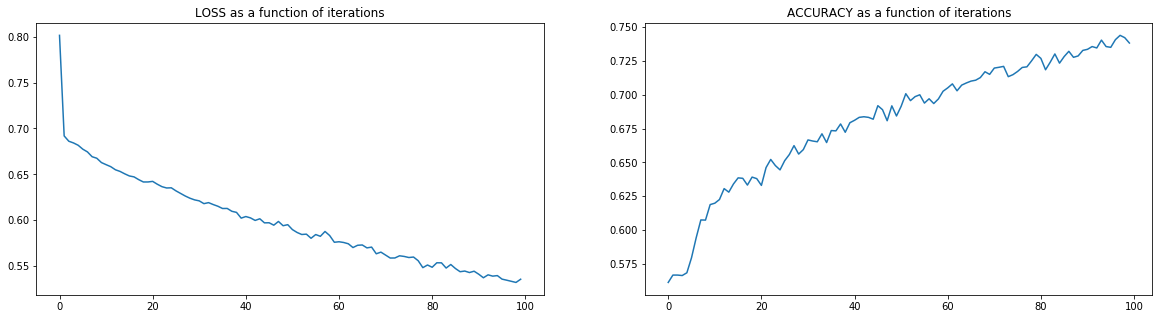

In [58]:
lstm_model = Sequential()
lstm_model.add(LSTM(30, 
                    input_shape = (44, 144), 
                    dropout = 0.5,
                    activity_regularizer = regularizers.l2(0.1)))
lstm_model.add(Dense(units = 2, 
                activation='softmax'))
#Construct Loss
lstm_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = lstm_model.fit(X_train_stat_descrp, Y_train, epochs = 100, batch_size = 32, verbose = True)
end = time.time()

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))
ax1.plot(training.history['loss'])
ax1.set_title('LOSS as a function of iterations')
ax2.plot(training.history['acc'])
ax2.set_title('ACCURACY as a function of iterations')

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = lstm_model.evaluate(X_val_stat_descrp, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

In [59]:
lstm_model = Sequential()
lstm_model.add(LSTM(25, 
                    input_shape = (44, 144), 
                    dropout = 0.5,
                    activity_regularizer = regularizers.l2(0.1)))
lstm_model.add(Dense(units = 10,
                    activation = 'relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(units = 2, 
                activation='softmax'))
#Construct Loss
lstm_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = lstm_model.fit(X_train_stat_descrp, Y_train, epochs = 100, batch_size = 32, verbose = True)
end = time.time()

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))
ax1.plot(training.history['loss'])
ax1.set_title('LOSS as a function of iterations')
ax2.plot(training.history['acc'])
ax2.set_title('ACCURACY as a function of iterations')

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = lstm_model.evaluate(X_val_stat_descrp, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/100
8803/8803 [==============================] - 21s 2ms/step - loss: 0.7997 - acc: 0.5626
Epoch 2/100
8803/8803 [==============================] - 16s 2ms/step - loss: 0.6922 - acc: 0.5667
Epoch 3/100
8803/8803 [==============================] - 16s 2ms/step - loss: 0.6861 - acc: 0.5666
Epoch 4/100
8803/8803 [==============================] - 15s 2ms/step - loss: 0.6832 - acc: 0.5675
Epoch 5/100
8803/8803 [==============================] - 15s 2ms/step - loss: 0.6786 - acc: 0.5733
Epoch 6/100
8803/8803 [==============================] - 15s 2ms/step - loss: 0.6734 - acc: 0.5934
Epoch 7/100
8803/8803 [==============================] - 15s 2ms/step - loss: 0.6714 - acc: 0.5907
Epoch 8/100
8803/8803 [==============================] - 15s 2ms/step - loss: 0.6671 - acc: 0.5900
Epoch 9/100
8803/8803 [==============================] - 15s 2ms/step - loss: 0.6640 - acc: 0.5910
Epoch 10/100
8803/8803 [==============================] - 16s 2ms/step - loss: 0.6610 - acc: 0.6009
Epoch 11/

KeyboardInterrupt: 

In [60]:
print('\nTEST')
evalu = lstm_model.evaluate(X_val_stat_descrp, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))


TEST
3773/3773 [==============================] - 3s 903us/step
Loss: 0.6873387763710639
Accuracy: 0.5960773919799617


# Back to normal features

In [63]:
X_train_im = X_train.reshape((nb_games_train, 11, -1), order = 'F')
X_val_im = X_val.reshape((nb_games_val, 11, -1), order = 'F')

Epoch 1/100
8803/8803 [==============================] - 85s 10ms/step - loss: 2.3686 - acc: 0.5547
Epoch 2/100
8803/8803 [==============================] - 7s 835us/step - loss: 1.3620 - acc: 0.5665
Epoch 3/100
8803/8803 [==============================] - 7s 821us/step - loss: 1.2194 - acc: 0.5645 1s - loss: 1
Epoch 4/100
8803/8803 [==============================] - 7s 773us/step - loss: 1.1462 - acc: 0.5659
Epoch 5/100
8803/8803 [==============================] - 8s 860us/step - loss: 1.1176 - acc: 0.5656
Epoch 6/100
8803/8803 [==============================] - 8s 903us/step - loss: 1.0686 - acc: 0.5657
Epoch 7/100
8803/8803 [==============================] - 7s 840us/step - loss: 1.0453 - acc: 0.5662
Epoch 8/100
8803/8803 [==============================] - 6s 735us/step - loss: 1.0312 - acc: 0.5651
Epoch 9/100
8803/8803 [==============================] - 7s 829us/step - loss: 1.0336 - acc: 0.5666
Epoch 10/100
8803/8803 [==============================] - 7s 761us/step - loss: 1.0156 

8803/8803 [==============================] - 7s 836us/step - loss: 0.8034 - acc: 0.5669
Epoch 83/100
8803/8803 [==============================] - 7s 841us/step - loss: 0.8099 - acc: 0.5667
Epoch 84/100
8803/8803 [==============================] - 8s 891us/step - loss: 0.8055 - acc: 0.5670
Epoch 85/100
8803/8803 [==============================] - 8s 887us/step - loss: 0.8179 - acc: 0.5670
Epoch 86/100
8803/8803 [==============================] - 8s 863us/step - loss: 0.8085 - acc: 0.5665
Epoch 87/100
8803/8803 [==============================] - 8s 852us/step - loss: 0.8069 - acc: 0.5666
Epoch 88/100
8803/8803 [==============================] - 8s 929us/step - loss: 0.8019 - acc: 0.5670
Epoch 89/100
8803/8803 [==============================] - 7s 807us/step - loss: 0.8077 - acc: 0.5670
Epoch 90/100
8803/8803 [==============================] - 8s 858us/step - loss: 0.7998 - acc: 0.5675
Epoch 91/100
8803/8803 [==============================] - 6s 725us/step - loss: 0.7965 - acc: 0.5671
Epo

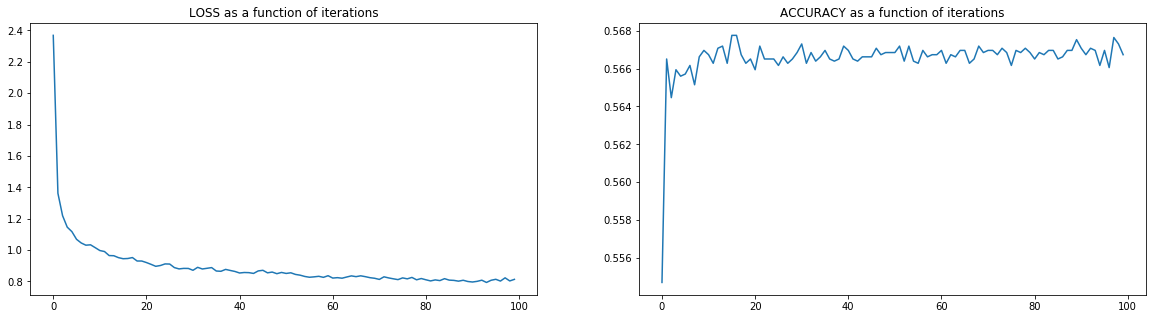

In [65]:
lstm_model = Sequential()
lstm_model.add(LSTM(30, 
                    input_shape = (11, 1440), 
                    dropout = 0.5,
                    activity_regularizer = regularizers.l2(0.1)))
lstm_model.add(Dense(units = 10,
                    activation = 'relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(units = 2, 
                activation='softmax'))
#Construct Loss
lstm_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = lstm_model.fit(X_train_im, Y_train, epochs = 100, batch_size = 32, verbose = True)
end = time.time()

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))
ax1.plot(training.history['loss'])
ax1.set_title('LOSS as a function of iterations')
ax2.plot(training.history['acc'])
ax2.set_title('ACCURACY as a function of iterations')

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = lstm_model.evaluate(X_val_im, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))